In [2]:
!pip install ultralytics


   ---------------------------------------- 881.2/881.2 kB 6.2 MB/s eta 0:00:00
   ---------------------------------------- 14.8/14.8 MB 577.0 kB/s eta 0:00:00
   -------------------------------------- 294.9/294.9 kB 865.3 kB/s eta 0:00:00
   -------------------------------------- 203.1/203.1 MB 859.1 kB/s eta 0:00:00
   ---------------------------------------- 6.2/6.2 MB 735.0 kB/s eta 0:00:00
   ---------------------------------------- 1.6/1.6 MB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 1.7/1.7 MB 1.3 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.2
    Uninstalling sympy-1.13.2:
      Successfully uninstalled sympy-1.13.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
faiss-cpu 1.9.0 requires numpy<3.0,>=1.25.0, but you have numpy 1.24.4 which is incompatible.
langchain 0.2.14 requires langchain-core<0.3.0,>=0.2.32, but you have langchain-core 0.3.13 which is incompatible.
langchain-chroma 0.1.2 requires langchain-core<0.3,>=0.1.40, but you have langchain-core 0.3.13 which is incompatible.
langchain-community 0.2.12 requires langchain-core<0.3.0,>=0.2.30, but you have langchain-core 0.3.13 which is incompatible.
stegano 0.11.1 requires pillow<10.0.0,>=9.2.0, but you have pillow 10.4.0 which is incompatible.
tensorboard 2.11.0 requires protobuf<4,>=3.9.2, but you have protobuf 4.25.4 which is incompatible.
tensorflow-intel 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.25.4 which is incompatible.

[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[noti

In [3]:
!python.exe -m pip install --upgrade pip

   ---------------------------------------- 1.8/1.8 MB 1.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [1]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

In [2]:
model= YOLO('best.pt')

In [6]:
prediction = model.predict(source='images/003a5aaf6d17c917.jpg',conf=0.15, iou=0.3, classes=[0])


image 1/1 c:\Users\MSI\Desktop\AutomaticPlateNumberRecognition\images\003a5aaf6d17c917.jpg: 448x640 1 license_plate, 58.0ms
Speed: 5.4ms preprocess, 58.0ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)


In [9]:
print(prediction)

[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'license_plate'}
obb: None
orig_img: array([[[253, 255, 254],
        [255, 255, 252],
        [254, 254, 248],
        ...,
        [214, 213, 217],
        [214, 213, 217],
        [215, 214, 218]],

       [[252, 255, 251],
        [254, 255, 251],
        [252, 251, 247],
        ...,
        [216, 215, 219],
        [215, 214, 218],
        [216, 215, 219]],

       [[254, 255, 251],
        [255, 255, 251],
        [251, 250, 246],
        ...,
        [216, 215, 219],
        [215, 213, 219],
        [216, 214, 220]],

       ...,

       [[105, 135, 184],
        [109, 141, 190],
        [112, 145, 194],
        ...,
        [137, 150, 172],
        [136, 148, 166],
        [138, 148, 165]],

       [[111, 148, 198],
        [113, 150, 200],
        [114, 149, 199],
        ...,
        [136, 150, 169],
        [136, 148, 166],
     

In [3]:
def preprocess_bbox(bbox, img_height, img_width):
    
    
    return [int(bbox[0]), int(bbox[1]), int(bbox[2]), int(bbox[3])]   


def plot_predicted_data(predicted):

    fig = plt.figure(figsize=(20, 20)) 
    rows = 4
    columns = 4
    
    
    for i, pred in enumerate(predicted):
        img_path = pred.path
        bboxes = pred.boxes.xyxy
        
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_h, img_w, _ = img.shape
        
        for bbox in bboxes:
            bbox = preprocess_bbox(bbox.tolist(), img_h, img_w)
            cv2.rectangle(img=img, pt1=(bbox[0], bbox[1]), pt2=(bbox[2], bbox[3]), color=(255, 0, 155), thickness=2)
        fig.add_subplot(rows, columns, i+1) 
        plt.imshow(img)
    plt.show()  

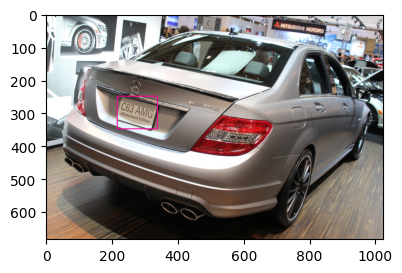

In [12]:
plot_predicted_data(prediction)

Now, to make sure the model performs well we will run an inference using an image from another dataset to evaluate the result

In [14]:
prediction = model.predict(source='images/test/cars412.png',conf=0.15, iou=0.3, classes=[0])


image 1/1 c:\Users\MSI\Desktop\AutomaticPlateNumberRecognition\images\test\cars412.png: 384x640 1 license_plate, 62.0ms
Speed: 2.0ms preprocess, 62.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


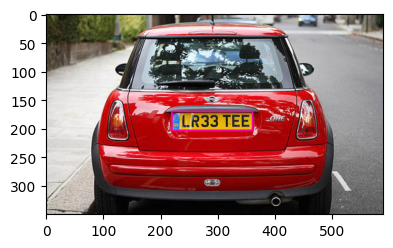

In [15]:
plot_predicted_data(prediction)

as shown in the figures, the YOLOv8 model works fine after fine-tuning on the test set and on other datasets 

In [3]:
prediction = model.predict(source='images/Test2.png',conf=0.15, iou=0.3, classes=[0])


image 1/1 c:\Users\MSI\Desktop\AutomaticPlateNumberRecognition\images\Test2.png: 512x640 1 license_plate, 116.5ms
Speed: 7.0ms preprocess, 116.5ms inference, 12.0ms postprocess per image at shape (1, 3, 512, 640)


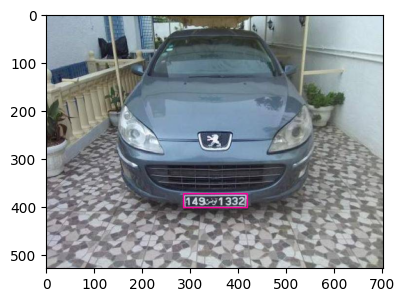

In [6]:
plot_predicted_data(prediction)

In [9]:
print(prediction[0].boxes)

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.])
conf: tensor([0.7080])
data: tensor([[286.2066, 373.9631, 419.8049, 402.7630,   0.7080,   0.0000]])
id: None
is_track: False
orig_shape: (528, 702)
shape: torch.Size([1, 6])
xywh: tensor([[353.0057, 388.3630, 133.5984,  28.7999]])
xywhn: tensor([[0.5029, 0.7355, 0.1903, 0.0545]])
xyxy: tensor([[286.2066, 373.9631, 419.8049, 402.7630]])
xyxyn: tensor([[0.4077, 0.7083, 0.5980, 0.7628]])


In [4]:
!pip install easyocr

   ---------------------------------------- 2.9/2.9 MB 2.3 MB/s eta 0:00:00
   ---------------------------------------- 38.8/38.8 MB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 12.9/12.9 MB 1.4 MB/s eta 0:00:00
   ---------------------------------------- 44.8/44.8 MB 769.5 kB/s eta 0:00:00
   ---------------------------------------- 1.4/1.4 MB 877.2 kB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.8.0
    Uninstalling scipy-1.8.0:
      Successfully uninstalled scipy-1.8.0


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\Users\\MSI\\AppData\\Local\\Programs\\Python\\Python310\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.

